In [26]:
from csv import reader
import csv

opened_file=open("Data Exercise.csv")
read_file=reader(opened_file)
data=list(read_file)

data=data[1:]
data_total=[]      

# Cleaning data

In [27]:
data_total=[]    
for row in data:
    connect_date=row[2]
    if row[0]=="" and connect_date!="":
        row[0]=connect_date
    if row[0]!="": #date
        data_total.append(row)

for row in data_total:
    business_type=row[1]
    business_type=business_type.replace("Retail - ","")
    business_type=business_type.replace("Services - ","")
    row[1]=business_type

# Creating datasets for the monthly totals

In [28]:
jan_total=[]
feb_total=[]
march_total=[]

for row in data_total:
    date=row[0]
    connect_date=row[2]
    if "Jan" in date:
        jan_total.append(row)
    elif "Feb" in date:
        feb_total.append(row)
    elif "Mar" in date:
         march_total.append(row)

#Adding leads that have not be dialled to the month connections were made
for row in data_total:
    date=row[0]
    connect_date=row[2]
    if "Jan" in date and "Feb" in connect_date:
        feb_total.append(row)
    elif "Jan" in date and "Mar" in connect_date:
        march_total.append(row)
    elif "Feb" in date and "Mar" in connect_date:
        march_total.append(row)

# Creating datasets for dialled connections

In [29]:
data_dialled=[]
for row in data_total:
    connect_date=row[2]
    if connect_date!="":
        data_dialled.append(row)

jan_dialled=[]
feb_dialled=[]
march_dialled=[]
diff_format=[]

for row in data_dialled:
    date=row[0]
    connect_date=row[2]
    if "Jan" in connect_date:
        jan_dialled.append(row)
    elif "Feb" in connect_date:
        feb_dialled.append(row)
    elif "Mar" in connect_date:
        march_dialled.append(row)
    else:
        diff_format.append(row)

for row in diff_format:
    if "-" in row[2]:
        connect_date=row[2].split("-")
        row[2]=connect_date
    elif "/" in row[2]:
        connect_date=row[2].split("/")
        row[2]=connect_date
        
for row in diff_format:
    connect_date=row[2]
    if connect_date[1] == "1":
        jan_dialled.append(row)
    elif connect_date[1] == "2":
        feb_dialled.append(row)
    elif connect_date[1] == "3":
        march_dialled.append(row)

# Creating datasets for monthly connected leads and leads for endorsement

In [30]:
def sort_status(data,index,string):
    LIST=[]
    for row in data:
        status=row[index]
        if string in status:
            LIST.append(row)
    return LIST
            
jan_connected=sort_status(jan_dialled,3,"_Connected")
feb_connected=sort_status(feb_dialled,3,"_Connected")
march_connected=sort_status(march_dialled,3,"_Connected")

jan_endorsement=sort_status(jan_connected,4,"For_Endorsement")
feb_endorsement=sort_status(feb_connected,4,"For_Endorsement")
march_endorsement=sort_status(march_connected,4,"For_Endorsement")

# Creating Frequency Tables to count the number of endorsements and connections by Industry

In [31]:
def freq_table(dataset,index):
    table={}
    total=0
    
    for row in dataset:
        total+=1
        value=row[index]
        if value in table:
            table[value]+=1
        else:
            table[value]=1
    
    return table

def cumulative_freq_table(curr_dict,prev_dict):
    for key in curr_dict:
        if key in prev_dict:
            curr_dict[key]=curr_dict[key]+prev_dict[key]
    return curr_dict

endorsements_by_industry_jan=freq_table(jan_endorsement,1)
endorsements_by_industry_feb=cumulative_freq_table(freq_table(feb_endorsement,1),endorsements_by_industry_jan)
endorsements_by_industry_march=cumulative_freq_table(freq_table(march_endorsement,1),endorsements_by_industry_feb)

connections_by_industry_jan=freq_table(jan_connected,1)
connections_by_industry_feb=cumulative_freq_table(freq_table(feb_connected,1),connections_by_industry_jan)
connections_by_industry_march=cumulative_freq_table(freq_table(march_connected,1),connections_by_industry_feb)

# Caclulate the percentage of endorsements over connections by Industry

In [32]:
def percentage_calc(dict1,dict2):
    newdict={}
    for key in dict1:
        newdict[key]=round((dict1[key]/dict2[key])*100,2)
    return newdict

endo_perc_jan=percentage_calc(endorsements_by_industry_jan,connections_by_industry_jan)
endo_perc_feb=percentage_calc(endorsements_by_industry_feb,connections_by_industry_feb)
endo_perc_march=percentage_calc(endorsements_by_industry_march,connections_by_industry_march)

# Creating Bar Charts

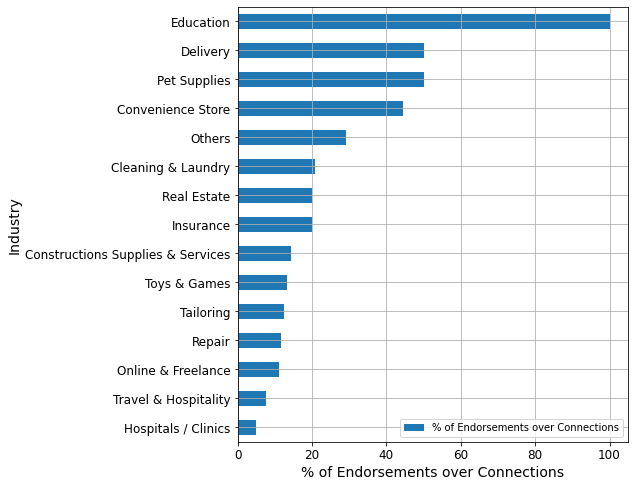

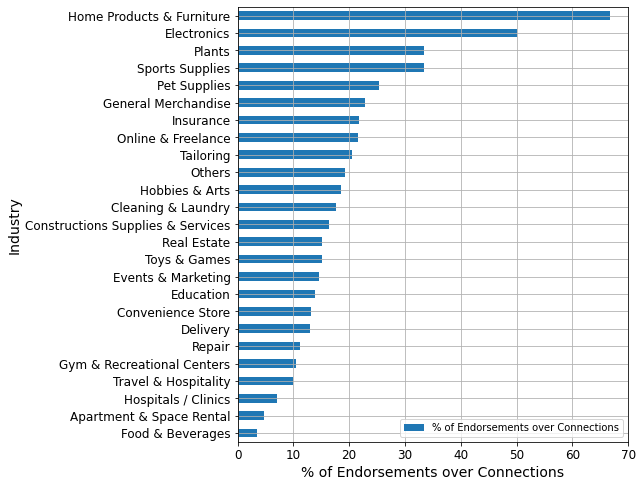

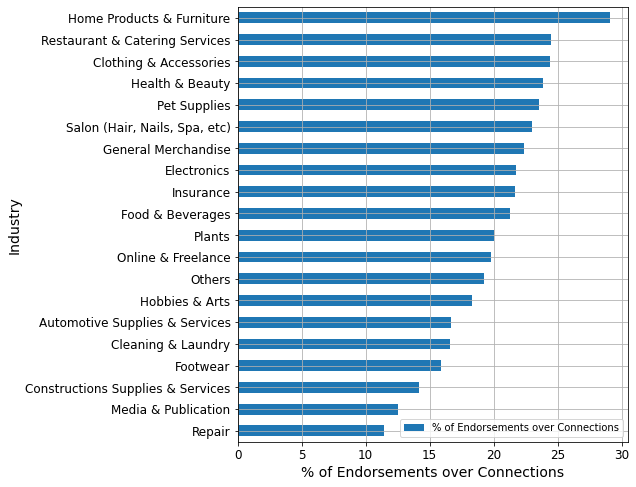

In [33]:
import pandas as pd
import matplotlib

#creating dataframes for percentage of endorsements over connections
df_jan = pd.DataFrame(list(endo_perc_jan.items()),columns = ['Industry','% of Endorsements over Connections'])
df_feb = pd.DataFrame(list(endo_perc_feb.items()),columns = ['Industry','% of Endorsements over Connections'])
df_march = pd.DataFrame(list(endo_perc_march.items()),columns = ['Industry','% of Endorsements over Connections'])

df_jan=df_jan.set_index("Industry")
df_feb=df_feb.set_index("Industry")
df_march=df_march.set_index("Industry")


df_jan=df_jan.sort_values(by=['% of Endorsements over Connections'], ascending = True)
df_feb=df_feb.sort_values(by=['% of Endorsements over Connections'], ascending = True)
df_march=df_march.sort_values(by=['% of Endorsements over Connections'], ascending = True)

ax= df_jan.plot.barh(figsize=(7,8),grid=True, fontsize=12, legend=True);
ax.set_xlabel("% of Endorsements over Connections",fontsize = 14)
ax.set_ylabel("Industry",fontsize = 14)

ax2 = df_feb.plot.barh(figsize=(7,8),grid=True,fontsize=12,legend=True)
ax2.set_xlabel("% of Endorsements over Connections",fontsize = 14)
ax2.set_ylabel("Industry",fontsize = 14)

ax3 = df_march.plot.barh(figsize=(7,8),grid=True,fontsize=12,legend=True)
ax3.set_xlabel("% of Endorsements over Connections",fontsize = 14)
ax3.set_ylabel("Industry",fontsize = 14)

# #creating dataframes for number of endorsement
# df_jan_endo = pd.DataFrame(list(endorsements_by_industry_jan.items()),columns = ['Industry','Number of Endorsements'])
# df_feb_endo = pd.DataFrame(list(endorsements_by_industry_feb.items()),columns = ['Industry','Number of Endorsements'])
# df_march_endo = pd.DataFrame(list(endorsements_by_industry_march.items()),columns = ['Industry','Number of Endorsements'])

# df_jan_endo=df_jan_endo.set_index("Industry")
# df_feb_endo=df_feb_endo.set_index("Industry")
# df_march_endo=df_march_endo.set_index("Industry")

# df_jan_endo=df_jan_endo.sort_values(by=['Number of Endorsements'])
# df_feb_endo=df_feb_endo.sort_values(by=['Number of Endorsements'])
# df_march_endo=df_march_endo.sort_values(by=['Number of Endorsements'])

# DF_jan=pd.merge(df_jan, df_jan_endo, on="Industry", how="outer")
# DF_feb=pd.merge(df_feb,df_feb_endo, on='Industry', how="outer")
# DF_march=pd.merge(df_march,df_march_endo, on='Industry', how="outer")

# DF_jan.to_csv("Jan.csv")
# DF_feb.to_csv("Feb.csv")
# DF_march.to_csv("March.csv")

#print(DF_jan)
#print(DF_feb)
#print(DF_march)

# ax= DF_jan.plot.barh(figsize=(7,8),grid=True, fontsize=12, legend=True);
# ax2 = DF_feb.plot.barh(figsize=(7,8),grid=True,fontsize=12,legend=True)
# ax3 = DF_march.plot.barh(figsize=(7,8),grid=True,fontsize=12,legend=True)

# fig = ax.get_figure()
# fig.savefig('jan1.jpg',bbox_inches="tight")
# fig2 = ax2.get_figure()
# fig2.savefig('feb1.jpg',bbox_inches="tight")
fig3 = ax3.get_figure()
fig3.savefig('mar1.jpg',bbox_inches="tight")

# Plotting Sales Funnels

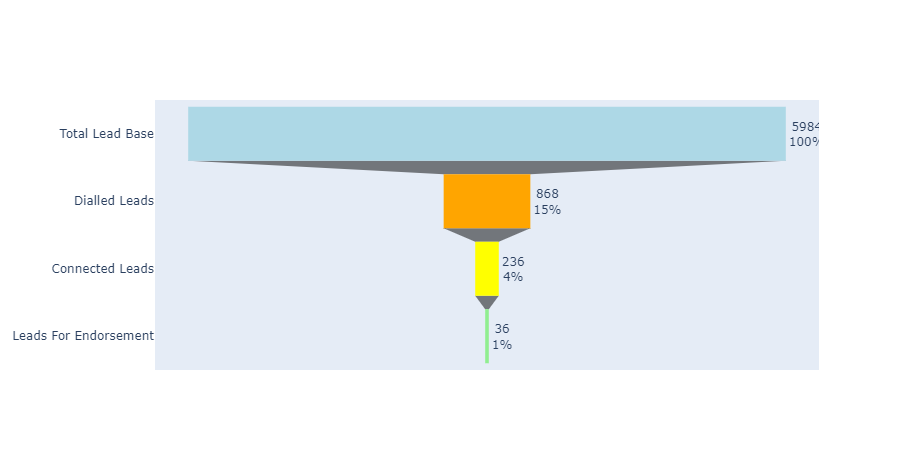

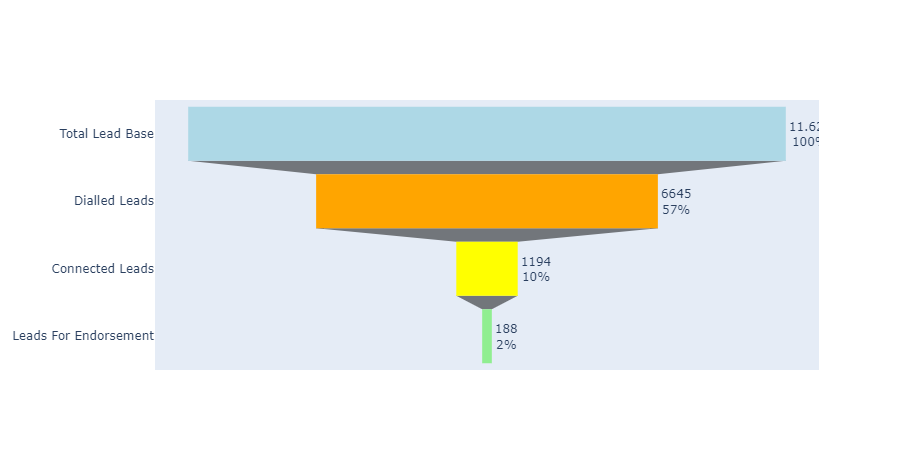

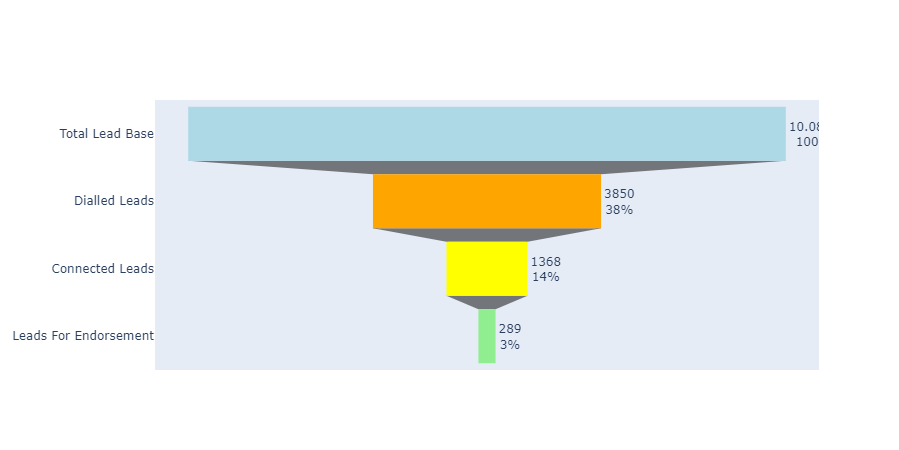

In [34]:
from plotly import graph_objects as go

fig = go.Figure()
fig2=go.Figure()
fig3=go.Figure()
fig.add_trace(go.Funnel(
    name = 'January',
    y = ["Total Lead Base", "Dialled Leads", "Connected Leads", "Leads For Endorsement"],
    x = [len(jan_total), len(jan_dialled), len(jan_connected), len(jan_endorsement)],
    opacity = 1, marker = {"color": ["lightblue", "orange", "yellow", "lightgreen"]},
    textposition = "outside",
    textinfo = "value+percent initial"))

fig2.add_trace(go.Funnel(
    name = 'February',
    orientation = "h",
    y = ["Total Lead Base", "Dialled Leads", "Connected Leads", "Leads For Endorsement"],
    x = [len(feb_total), len(feb_dialled), len(feb_connected), len(feb_endorsement)],
    opacity = 1, marker = {"color": ["lightblue", "orange", "yellow", "lightgreen"]},
    textposition = "outside",
    textinfo = "value+percent initial"))

fig3.add_trace(go.Funnel(
    name = 'March',
    orientation = "h",
    y = ["Total Lead Base", "Dialled Leads", "Connected Leads", "Leads For Endorsement"],
    x = [len(march_total), len(march_dialled), len(march_connected), len(march_endorsement)],
    opacity = 1, marker = {"color": ["lightblue", "orange", "yellow", "lightgreen"]},
    textposition = "outside",
    textinfo = "value+percent initial"))

fig.show()
fig2.show()
fig3.show()